In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import norm

In [29]:
mu = 1000
mean = 950
sigma = 40
n = 40

In [31]:
z = (mean-mu)/(sigma/np.sqrt(n))
z

-7.905694150420949

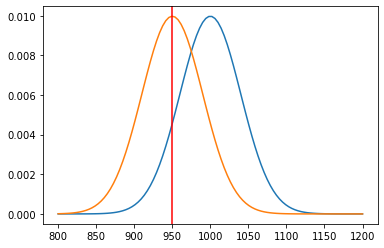

In [39]:
x = np.linspace(800,1200,100)
plt.plot( x, norm.pdf( x, loc=mu, scale=sigma ) )
plt.plot( x, norm.pdf( x, loc=mean, scale=sigma ) )
plt.axvline(x=mean,color='r')
#plt.yscale('log')

In [5]:
df = pd.read_csv('../Data/Sesion7/Binomial.csv')

In [6]:
df

,NCaras,ObsFreq
0,0,38
1,1,143
2,2,343
3,3,285
4,4,166
5,5,25
